## Aldrich HW 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import least_squares
from sympy import *

 # Question 1

Background:
    N = 100000
    lifespan 100 weeks
    duration of infection = 2 weeks 
    believe that cases observed represent 10% of all cases (approximation) 
    7/1000 tested positive
    independently: 517 tested positive for Abs

# Part A

Estimate R0 by examining the period of exponential growth (Method 1, Week 9). Be sure to
show your work and plots as relevant. In the process, look up the 95% confidence interval
associated with estimating a slope from data points, and use the slope’s confidence interval to
provide a confidence interval for your R0 estimate

In [2]:
df = pd.read_csv("all_weeks_modified.csv") 


week = df["Week"]
new_cases = df["New Cases"]

# sum the current week with the week prior
total_observed_cases = df["Total Observed Cases"]

# account for 10% ascertainment 
total_cases = df["Total Cases"]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


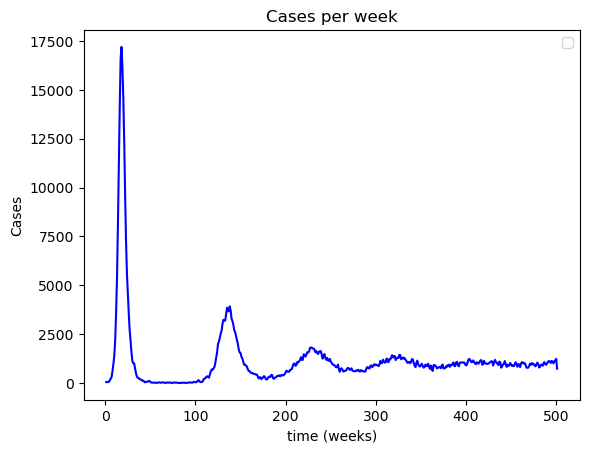

In [3]:
fig, ax = plt.subplots()
ax.plot(week, total_cases, c='blue')


plt.title('Cases per week')
ax.set_xlabel('time (weeks)')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

0.4355533987975767


/tmp/ipykernel_124/2760542222.py:1: RuntimeWarning: divide by zero encountered in log
  log_total_cases = np.log(total_cases.to_numpy())


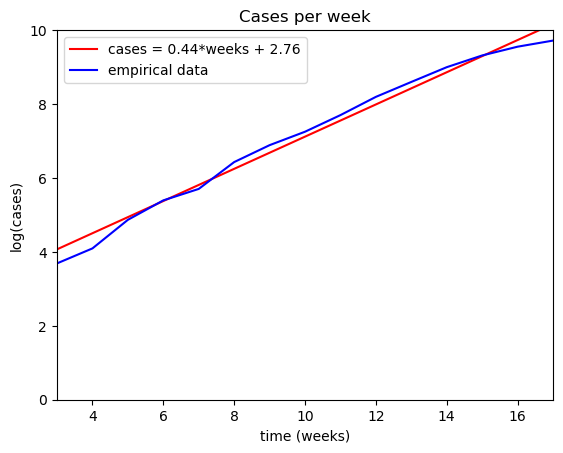

In [4]:

log_total_cases = np.log(total_cases.to_numpy()) 


fit = linregress(week.to_numpy()[3:17], log_total_cases[3:17])

print(fit.slope) 

# Calculate the fitted line
predicted_cases = fit.slope * week + fit.intercept

fig, ax = plt.subplots()
plt.plot(week, predicted_cases, color='red', label=f'cases = {fit.slope:.2f}*weeks + {fit.intercept:.2f}')

ax.plot(week, log_total_cases, c='blue', label='empirical data')

#plt.yscale("log") 
plt.xlim(3, 17)
plt.ylim(0, 10)
plt.title('Cases per week')
ax.set_xlabel('time (weeks)')
ax.set_ylabel('log(cases)')
plt.legend()
plt.show()

In [5]:
# derive mu from life expectancy 
mu = 1 / 100 

# derive gamma from duration of infection 
gamma = 0.5


R0_from_method_1 = 1 + (fit.slope / (gamma + mu) ) 

# determine the 95% CI for i_eq 
n = 100000  # number of trials 

p_hat = np.random.binomial(n, fit.slope) / n 

#var_p = p*(1-p) / n 
#std_p = np.sqrt(p*(1-p) / n)

slope_CI_upper = fit.slope + 1.96*np.sqrt( (fit.slope)*(1 - fit.slope) / n) 
slope_CI_lower = fit.slope - 1.96*np.sqrt( (fit.slope)*(1 - fit.slope) / n) 

#propagate the CI for slope into the equation for R0 to find the CI for R0 
R0_method_1_CI_upper = 1 + (slope_CI_upper / (gamma + mu) ) 
R0_method_1_CI_lower = 1 + (slope_CI_lower / (gamma + mu) ) 


print(f'R0 extrapolated from method 1: {R0_from_method_1}') 
print(f'The 95% for R0 from method 1: [{R0_method_1_CI_lower:.5f}, {R0_method_1_CI_upper:.5f}]')


R0 extrapolated from method 1: 1.8540262721521112
The 95% for R0 from method 1: [1.84800, 1.86005]


# Part B

Estimate R0 by utilizing the prevalence or seroprevalence data. (Method 2 or 4, Week 9). Be
sure to show your work and plots as relevant. Write down (or look up) the 95% confidence
interval for the prevalence/seroprevalence estimate, and use it to provide a confidence interval
for R0

991.1


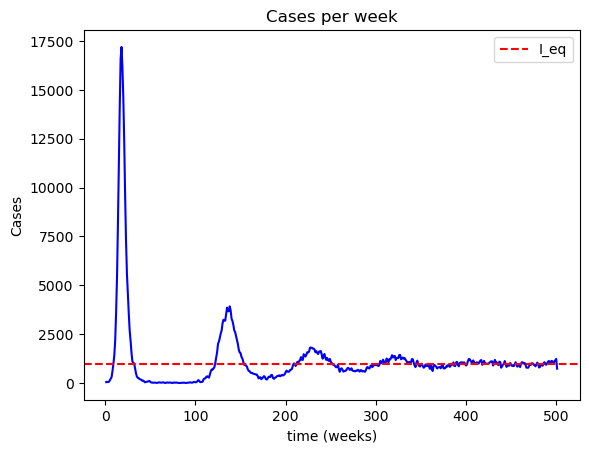

Extrapolating from i_eq, 0.00991), R0 = 2.02209
The 95% CI for R0 for method 2 [1.87680, 2.12477]


In [6]:
# utilize empirical data to approximate i_eq

# derive mu from life expectancy 
mu = 1 / 100 

# derive gamma from duration of infection 
gamma = 0.5


equilibrium_cases = total_cases[-100:]

I_eq = np.mean(equilibrium_cases)

print(I_eq) 
N = 100000
i_eq = I_eq / N 

# determine the 95% CI for i_eq 
n = 100000  # number of trials 

p_hat = np.random.binomial(n, i_eq) / n 

#var_p = p*(1-p) / n 
#std_p = np.sqrt(p*(1-p) / n)

i_eq_CI_upper = p_hat + 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 
i_eq_CI_lower = p_hat - 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 


fig, ax = plt.subplots()
ax.plot(week, total_cases, c='blue')

plt.axhline(y=I_eq, color='r', linestyle='--', label='I_eq')
plt.title('Cases per week')
ax.set_xlabel('time (weeks)')
ax.set_ylabel('Cases')
plt.legend()
plt.show()


R0_from_method_2 = 1 / ( 1 - i_eq*( (gamma / mu) + 1 ) )

R0_method_2_CI_upper = 1 / ( 1 - i_eq_CI_upper *( (gamma / mu) + 1 ) )
R0_method_2_CI_lower =  1 / ( 1 - i_eq_CI_lower *( (gamma / mu) + 1 ) )


print(f'Extrapolating from i_eq, {i_eq:.5f}), R0 = {R0_from_method_2:.5f}') 
print(f'The 95% CI for R0 for method 2 [{R0_method_2_CI_lower:.5f}, {R0_method_2_CI_upper:.5f}]')

# Part C

Estimate R0 a third way from the same data

In [7]:
raw_seroprevalence = 517 / 1000

p_hat = np.random.binomial(n, raw_seroprevalence) / n

R0_from_seroprevalence = 1 / ( 1 - raw_seroprevalence) 

sero_CI_upper = p_hat + 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 
sero_CI_lower = p_hat - 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 

R0_method_3_CI_upper = 1 / ( 1 - sero_CI_upper) 
R0_method_3_CI_lower =  1 / ( 1 - sero_CI_lower)

print(f'Extrapolating from seroprevalence, {raw_seroprevalence:.5f}, R0 = {R0_from_seroprevalence:.5f}') 
print(f'The 95% CI for R0 calculated from seroprevalence [{R0_method_3_CI_lower:.5f}, {R0_method_3_CI_upper:.5f}]')

Extrapolating from seroprevalence, 0.51700, R0 = 2.07039
The 95% CI for R0 calculated from seroprevalence [2.05458, 2.08107]


# Part D

Compare your estimates, the uncertainty associated with each, and discuss what might cause
them to be different

R0 from method 1: 1.8540262721521112 with 95% CI [1.84800, 1.86005]
R0 from method 2:: 2.0220852147151183 with 95% CI [1.87680, 2.12477]
R0 from seroprevalence: 2.070393374741201 with 95% CI [2.05458, 2.08107]


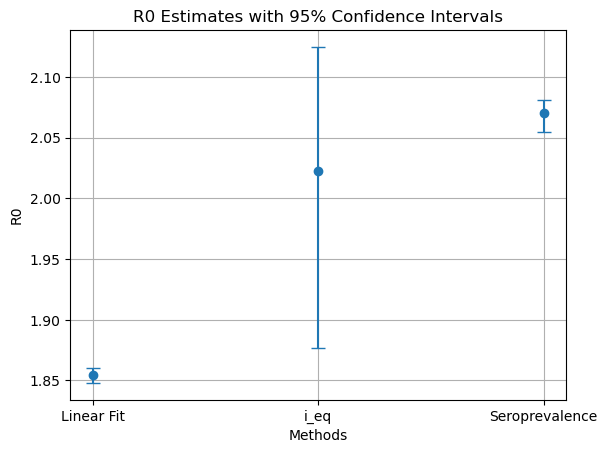

In [10]:
print(f'R0 from method 1: {R0_from_method_1} with 95% CI [{R0_method_1_CI_lower:.5f}, {R0_method_1_CI_upper:.5f}]')
print(f'R0 from method 2:: {R0_from_method_2} with 95% CI [{R0_method_2_CI_lower:.5f}, {R0_method_2_CI_upper:.5f}]')
print(f'R0 from seroprevalence: {R0_from_seroprevalence} with 95% CI [{R0_method_3_CI_lower:.5f}, {R0_method_3_CI_upper:.5f}]')


methods = ['Linear Fit', 'i_eq', 'Seroprevalence']
R0_values = [R0_from_method_1, R0_from_method_2, R0_from_seroprevalence]
CI_lower = [R0_method_1_CI_lower, R0_method_2_CI_lower, R0_method_3_CI_lower]
CI_upper = [R0_method_1_CI_upper, R0_method_2_CI_upper, R0_method_3_CI_upper]

# Calculate error bars
yerr_lower = [R0 - lower for R0, lower in zip(R0_values, CI_lower)]
yerr_upper = [upper - R0 for R0, upper in zip(R0_values, CI_upper)]

# Plotting
plt.errorbar(methods, R0_values, yerr=[yerr_lower, yerr_upper], fmt='o', capsize=5)
plt.xlabel('Methods')
plt.ylabel('R0')
plt.title('R0 Estimates with 95% Confidence Intervals')
plt.grid(True)
plt.show()

# Part E

Estimate Rt using Method 5

In [ ]:
def R_t(time):
    # define omega(T), a distribution for generation interval 
    # generation interval = dt between infection 1 and infection 2
    
    R_j = []
    
    # relative likelihood j -> i 
    for week in time:  
        numerator = omega(week[i] - week[i - 1])
        
        # what is the relationship between i, j and k?
        # is k the number of cases? 
        
        denominator = np.sum( omega(week[i] - week[ k ]) )
        
        p_ij = numerator / denominator 
        
        R_j.append(p_ij) 
                             
    return R_j  

# Question 2

Maria Lara conducts a prevalence study with the above diagnostic. She samples 100 people and
gets 39 positives. What is your estimate of the prevalence after correcting for the sensitivity and
specificity?

In [39]:
se = 0.9 
sp = 0.98

def prevalence(n_pos, n_tests, se, sp):
    return ( (n_pos / n_tests) - (1 - sp) ) / (se + sp - 1) 


theta_MariaL = prevalence(39, 100, se, sp) 
print(theta_MariaL) 

0.4204545454545455


# Part B

Write down a 95% confidence interval for your corrected estimate.

In [40]:
# CI for proportion p 

# MLE for p is npos / n 

n = 100000  # number of trials 

p_hat = np.random.binomial(n, theta_MariaL) / n 


#var_p = p*(1-p) / n 
#std_p = np.sqrt(p*(1-p) / n)

CI_upper = p_hat + 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 
CI_lower = p_hat - 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 

print(f'The 95% CI for Maria Lara corrected prevalence is [{CI_lower}, {CI_upper}]')


The 95% CI for Maria Lara corrected prevalence is [0.4185093312809777, 0.4246306687190223]


# Part C

rying to be helpful, Burt Q. Losis conducts a second prevalence study in the same population
and finds 18 positives out of 50 samples. Again estimate the prevalence and a 95% confidence
interval.

In [41]:
theta_BurtQ = prevalence(18, 50, se, sp)
print(theta_BurtQ)

0.38636363636363635


In [42]:
# CI for proportion p 

# MLE for p is npos / n 

n = 100000  # number of trials 

p_hat = np.random.binomial(n, theta_BurtQ) / n 


#var_p = p*(1-p) / n 
#std_p = np.sqrt(p*(1-p) / n)

CI_upper = p_hat + 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 
CI_lower = p_hat - 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 

print(f'The 95% CI for Burt Q corrected prevalence is [{CI_lower}, {CI_upper}]')

The 95% CI for Burt Q corrected prevalence is [0.38191415356588543, 0.38794584643411456]


# Part D

Pool Burt’s and Maria’s data to get a third estimate of prevalence, and update your 95% con-
fidence interval. How are your three estimates related? And, how are the widths of the three
confidence intervals related?

In [48]:
theta_pooled = prevalence(18 + 39, 150, se, sp)
print(theta_pooled) 

0.4090909090909091


In [44]:
# CI for proportion p 

# MLE for p is npos / n 

n = 100000  # number of trials 

p_hat = np.random.binomial(n, theta_pooled) / n 


#var_p = p*(1-p) / n 
#std_p = np.sqrt(p*(1-p) / n)

CI_upper = p_hat + 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 
CI_lower = p_hat - 1.96*np.sqrt( (p_hat)*(1 - p_hat) / n) 

print(f'The 95% CI for pooled corrected prevalence is [{CI_lower}, {CI_upper}]')

The 95% CI for pooled corrected prevalence is [0.40651208589106214, 0.4126079141089378]


# Part E

ou test yourself. Positive! What is your best guess of the probability that you are
actually positive?
3


In [51]:
# Pr(truly + | test +) = Pr (test+ | truly+) Pr(truly +) / Pr(test +) 

theta = prevalence(18 +40, 151, se, sp)
print(theta) 


Pr_truly_positive = se*theta / (se*theta + ( 1 - theta)*(1 - sp) )

print(f'The probability that I am truly positive is {Pr_truly_positive}') 
                                       

0.4137567730282963
The probability that I am truly positive is 0.969474921630094


# Question 3

Read in the data and produce a tall, skinny plot with three columns of data: the negative controls
(red), the positive controls (black), and the data from the field (blue). Use jitter and transparency
(“alpha”) to allow us to see the distributions of the data

In [12]:
data = np.genfromtxt('HW4_Q3_data.csv', delimiter=',', skip_header=1)

neg_control = np.genfromtxt('HW4_Q3_neg.csv', delimiter=',', skip_header=1)

pos_control = np.genfromtxt('HW4_Q3_pos.csv', delimiter=',', skip_header=1)


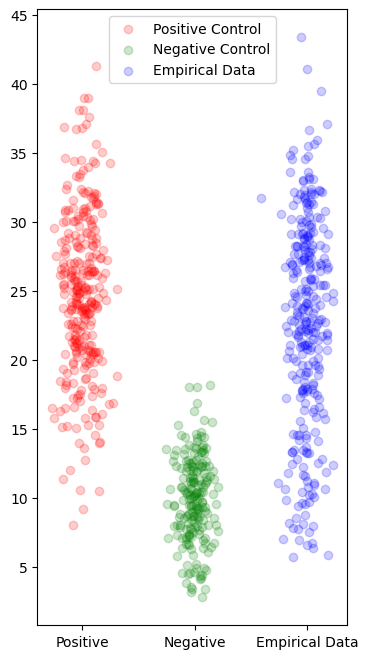

In [13]:
plt.figure(figsize=(4, 8))
ax = plt.gca()

ax.scatter(np.random.normal(1, 0.1, len(pos_control)), pos_control, color='red', label='Positive Control', alpha=0.2)

ax.scatter(np.random.normal(2, 0.1, len(neg_control)), neg_control, color='green', label='Negative Control', alpha=0.2)

ax.scatter(np.random.normal(3, 0.1, len(data)), data, color='blue', label='Empirical Data', alpha=0.2)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Positive', 'Negative', 'Empirical Data'])


plt.legend()
plt.show()


# Part B

Consider a cutoff c such that any assay values above c are to be called positive and any assay
values below c are to be called negative. Then write four functions: se(c), sp(c), and ˆφ(c) and
ˆθ(c). They should correspond to the sensitivity, the specificity, the raw prevalence in the field
data, and the corrected prevalence in the field data. What value of c corresponds to the “Youden”
choice?

In [14]:
def se(c, positive_cases): 
    # c - cutoff, an integer 
    # positive_cases - list of positive controls
    
    # initialize lists 
    true_positive = 0
    false_negative = 0
    
    for case in positive_cases: 
        if case > c: # true positive
            true_positive += 1
    
    for case in positive_cases:
        if case < c: # false negative 
            false_negative += 1
    
    se = true_positive / (true_positive + false_negative) 
    
    return se 
        

def sp(c, negative_cases):
    # c - cutoff, an integer 
    # negative_cases - list of negative controls
    
    # initialize 
    true_negative = 0
    false_positive= 0
    
    
    for case in negative_cases: 
        if case < c: # true negative 
            true_negative += 1
    
    for case in negative_cases: 
        if case > c: # false positive 
            false_positive += 1 
    
    sp = true_negative / (true_negative + false_positive) 
    
    return sp 

def phi_hat(c, data): 
    # c - cutoff, an integer 
    # data - list of empirical data
    
    # initialize
    positive_tests = 0 
    num_tests = len(data)
    
    
    for case in data: 
        if case > c: 
            positive_tests += 1 
    
    raw_prevalence = positive_tests / num_tests
    
    return raw_prevalence



In [15]:
def theta_redo(c, data, positive_cases, negative_cases, phi_hat, se, sp):
    
    se = se(c, positive_cases)
    
    sp = sp(c, negative_cases) 
    
    phi = phi_hat(c, data)
    
    if se + sp - 1 == 0: 
        se += 0.0000000001 
    else: 
        se += 0 
    
    corrected_prevalence = ( phi - (1 - sp)) / (se + sp - 1)
    
    return corrected_prevalence 
    

In [16]:
def theta_hatski(c, data, negative_cases, positive_cases):
    # carry over from phi hat
    positive_tests = 0 
    num_tests = len(data)
    
    
    for case in data: 
        if case > c: 
            positive_tests += 1 
    
    raw_prevalence = positive_tests / num_tests
    
    # carry over from se(c) 
    true_positive = 0
    false_negative = 0
    
    for case in positive_cases: 
        if case > c: # true positive
            true_positive += 1
    
    for case in positive_cases:
        if case < c: # false negative 
            false_negative += 1
    
    se = true_positive / (true_positive + false_negative) 
    
    
    # carry over from sp(c) 
    true_negative = 0
    false_positive= 0
    
    
    for case in negative_cases: 
        if case < c: # true negative 
            true_negative += 1
    
    for case in negative_cases: 
        if case > c: # false positive 
            false_positive += 1 
    
    sp = true_negative / (true_negative + false_positive) 
    
    if se + sp - 1 == 0: 
        se += 0.0000000001 
    else: 
        se += 0 
    
    corrected_prevalence = ( raw_prevalence - (1 - sp)) / (se + sp - 1) 
    
    #if se + sp == 1:
    #    corrected_prevalence = nan 
    #else: 
    #    corrected_prevalence = ( raw_prevalence - (1 - sp)) / (se + sp - 1) 
    
    return corrected_prevalence 
    
    

In [17]:
c_range = (0, 45, 100)

test_list = []

for c in c_range: 
    test_list.append(theta_hatski(c, data, neg_control, pos_control))
    
print(test_list) 


fubar = test_list[0]
print(fubar) 

#yourmom = theta_hat(2.9, data, neg_control, pos_control)
#print(yourmom) 

[0.0, 0.0, 0.0]
0.0


In [18]:
# J(c) so we can find the max and  index on c 

def J(c, negative_cases, positive_cases): 
    
    # carry over from sp function 
    true_negative = 0
    false_positive= 0
    
    for case in negative_cases: 
        if case < c: # true negative 
            true_negative += 1
    
    for case in negative_cases: 
        if case > c: # false positive 
            false_positive += 1 
    
    sp = true_negative / (true_negative + false_positive) 
    
    # carry over from se function 
    true_positive = 0
    false_negative = 0
    
    for case in positive_cases: 
        if case > c: # true positive
            true_positive += 1
    
    for case in positive_cases:
        if case < c: # false negative 
            false_negative += 1
    
    se = true_positive / (true_positive + false_negative) 
    
    
    J = se + sp - 1
    
    return J 

The cutoff that maximizes the Youden Index is 14.774774774774775


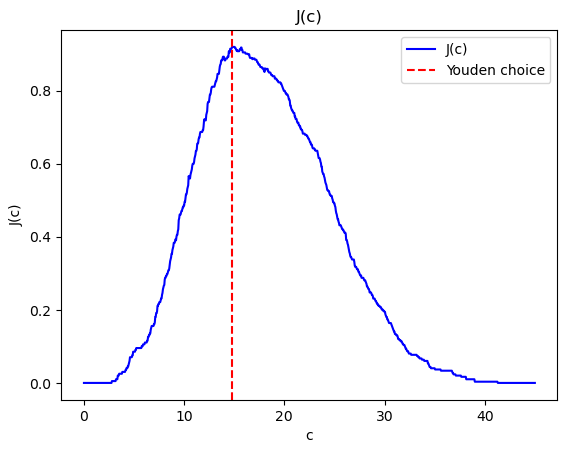

In [19]:
# optimize Youden

c_range = np.linspace(0, 45, 1000)

J_range = [J(c, neg_control, pos_control) for c in c_range]

J_max = np.max(J_range)
Youden_choice_idx = np.argmax(J_range)
Youden_choice = c_range[Youden_choice_idx]

print(f'The cutoff that maximizes the Youden Index is {Youden_choice}')

fig, ax = plt.subplots()
ax.plot(c_range, J_range, c='blue', label='J(c)')


ax.axvline(x=Youden_choice, color='red', linestyle='--', label='Youden choice')

plt.title('J(c)')
ax.set_xlabel('c')
ax.set_ylabel('J(c)')
plt.legend()
plt.show()

# Part C

By sweeping over various choices of c, plot a receiver operator curve, and place a
point at the Youden choice. Create a second plot showing how ˆθ(c) varies, and again, place a
point at the Youden choice

Text(0, 0.5, 'true positives')

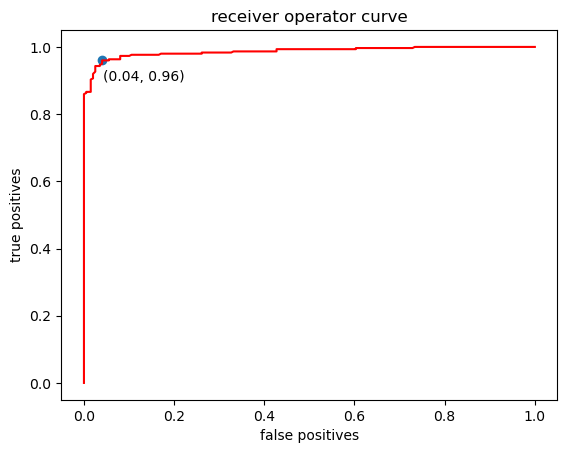

In [20]:
c_range = np.linspace(0, 45, 1000)

false_positives = []
true_positives = []

for c in c_range: 
    
    false_positives.append(1 - sp(c, neg_control))
    
    true_positives.append(se(c, pos_control))
    

    
# need to know values for se(c) and 1-sp(c) for the Youden choice 
Youden_true_pos = se(Youden_choice, pos_control)
Youden_false_pos = 1 - sp(Youden_choice, neg_control)


fig,ax = plt.subplots()

ax.plot(false_positives, true_positives, c='red')
plt.scatter(Youden_false_pos, Youden_true_pos, label='Youden_index')
plt.annotate(f'({Youden_false_pos:.2f}, {Youden_true_pos:.2f})', (Youden_false_pos, Youden_true_pos), textcoords="offset points", xytext=(30,-15), ha='center')

plt.title('receiver operator curve') 


ax.set_xlabel('false positives')
ax.set_ylabel('true positives')

Text(0, 0.5, 'theta_hat')

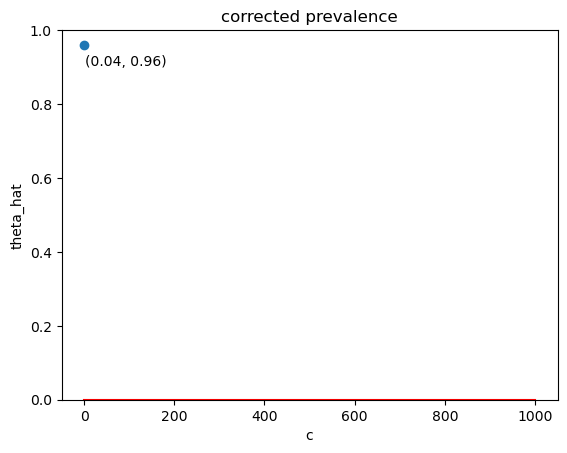

In [21]:
# Plot theta_hat(c) 

c_range = (0, 45, 1000)
theta_range = []

for c in c_range: 
    x = theta_redo(c, data, pos_control, neg_control, phi_hat, se, sp)
    theta_range.append(x)


fig,ax = plt.subplots()

ax.plot(c_range, theta_range, c='red')
                       
plt.scatter(Youden_false_pos, Youden_true_pos, label='Youden_index')
plt.annotate(f'({Youden_false_pos:.2f}, {Youden_true_pos:.2f})', (Youden_false_pos, Youden_true_pos), textcoords="offset points", xytext=(30,-15), ha='center')

plt.title('corrected prevalence') 

plt.ylim(0, 1) 
ax.set_xlabel('c')
ax.set_ylabel('theta_hat')



# Part D

rite 3-4 sentences reflecting on how the conclusions of a study might be affected by how one
decides to choose the cutoff at which positives and negatives are called